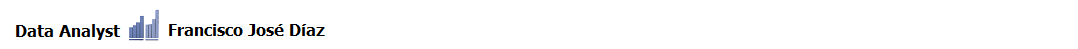
# **Regresión lineal multiple: Heart disease**

En este notebook, vamos a explorar el conjunto de datos “Enfermedades cardíacas”, que contiene información sobre los hábitos de ciclismo, los patrones de tabaquismo y los detalles sobre las enfermedades cardíacas. El objetivo es analizar la relación entre estas variables y construir un modelo de regresión lineal múltiple que pueda predecir el riesgo de enfermedad cardíaca en función de los factores del estilo de vida. El conjunto de datos tiene las columnas de **biking**, **smoking** y **heart.disease**. Se puede descargar desde [Kaggle](https://www.kaggle.com/datasets/udayr007/heart-disease).

Además, vamos a evaluar los supuestos del modelo de regresión lineal, que son:

- Linealidad del modelo: el modelo debe tener una relación lineal entre las variables independientes y la variable dependiente.

- Normalidad de los residuos: los residuos deben seguir una distribución normal con media cero y varianza constante.

- Multicolinealidad: las variables independientes no deben estar altamente correlacionadas entre sí, lo que puede afectar a la precisión de los coeficientes estimados y a las pruebas de hipótesis.

- Homocedasticidad: los residuos deben tener una varianza constante a lo largo de los valores ajustados, lo que implica que el error es el mismo para todos los niveles de la variable dependiente.

- Independencia de los residuos: los residuos deben ser independientes entre sí, lo que significa que no hay autocorrelación o correlación serial entre ellos.

- Exogeneidad y endogeneidad: este supuesto implica que las variables independientes no están correlacionadas con el término de error y que no hay variables omitidas que afecten al modelo. Este supuesto no se estudiará en este documento.

Este notebook tiene un propósito didáctico y no pretende ser una guía definitiva.

# Índice
- Breve análisis exploratorio
- Modelo de regresión lineal multiple
- Supuestos del modelo de regresion lineal

# Breve análisis exploratorio<a name="id1"></a>

In [ ]:
import warnings # Importa módulo de advertencias
warnings.filterwarnings('ignore') # Ignora las advertencias

import pandas as pd # Importa pandas
df = pd.read_csv("/content/drive/MyDrive/heartdata.csv") # Lee archivo CSV

df.head() # Muestra las primeras 5 filas del DataFrame

,Unnamed: 0,biking,smoking,heart.disease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224


In [ ]:
df = df.drop(['Unnamed: 0'], axis=1) # Elimina la columna 'Unnamed: 0'

- Estadistica descriptiva

In [ ]:
df.describe() # Genera estadísticas descriptivas

,biking,smoking,heart.disease
count,498.000000,498.000000,498.000000
mean,37.788411,15.435034,10.174538
std,21.481519,8.289959,4.571874
min,1.119154,0.525850,0.551898
25%,20.204598,8.279776,6.513683
50%,35.824459,15.814614,10.385255
75%,57.852786,22.568925,13.724024
max,74.907111,29.946743,20.453496


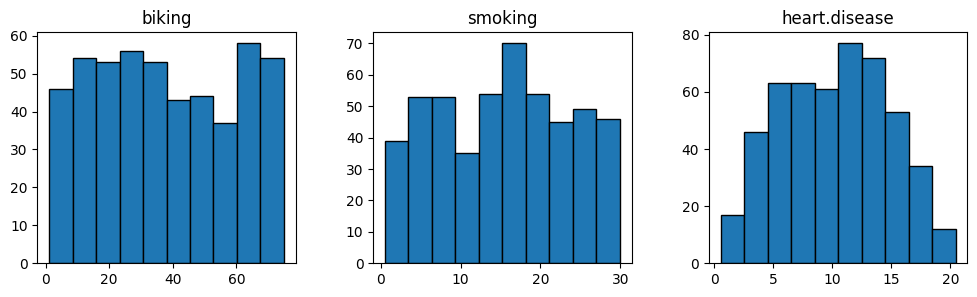

In [ ]:
import matplotlib.pyplot as plt # Importa la biblioteca para la visualización de datos

# Crea un histograma para cada columna
df.hist(figsize=(12,3), layout=(1,3), grid=False, edgecolor='black')

plt.show() # Muestra las gráficas

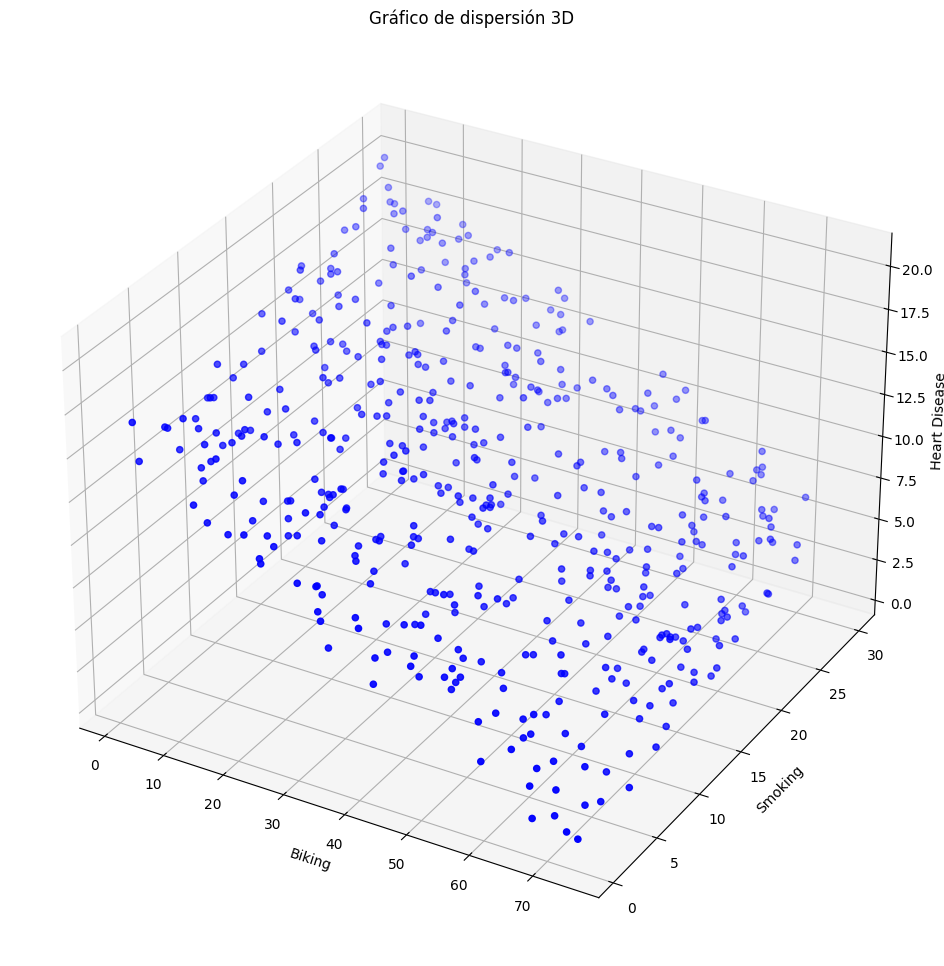

In [ ]:

# Obtener los valores de las variables independientes y dependiente
x1 = df['biking'].values
x2 = df['smoking'].values
z1 = df['heart.disease'].values

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Crear un gráfico de dispersión con los valores de las variables
ax.scatter(x1, x2, z1, color='blue')

# Añadir un título y las etiquetas de los ejes
ax.set_title("Gráfico de dispersión 3D")
ax.set_xlabel("Biking")
ax.set_ylabel("Smoking")
ax.set_zlabel("Heart Disease")

# Mostrar el gráfico
plt.show()

# Modelo de regresión lineal multiple<a name="id2"></a>

- Desarrollo del modelo

In [ ]:
import statsmodels.api as sm # Libreria necesaria

# Modelo de regresión lineal múltiple con statmodels
X = sm.add_constant(df[['biking', 'smoking']]) # Añadir una constante a las variables independientes
y = df['heart.disease'] # Variable dependiente

modelo = sm.OLS(y, X).fit() # Crear el modelo y Ajustar el modelo

modelo.summary() # Mostramos el resultado

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          heart.disease   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.190e+04
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:55:02   Log-Likelihood:                -493.68
No. Observations:                 498   AIC:                             993.4
Df Residuals:                     495   BIC:                             1006.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9847      0.080    186.988      0.000      14.827      15.142
biking        -0.2001      0.001   -146.525      0.000      -0.203      -0.197
smoking        0.1783      0.004     50.387      0.000       0.171       0.185
==============================================================================
Omnibus:                        2.794   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                2.582
Skew:                          -0.141   Prob(JB):                        0.275
Kurtosis:                       3.211   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El coeficiente R ajustado (Adj. R-squared) es 0.980, lo que significa que el modelo explica el 98% de la variabilidad de la variable dependiente. Esto indica que el modelo tiene un buen ajuste a los datos. El valor p del estadístico F (Prob (F-statistic)) es 0.00, lo que significa que el modelo es estadísticamente significativo a un nivel de confianza del 95%. Esto implica que al menos una de las variables independientes tiene un efecto significativo sobre la variable dependiente.

El coeficiente de la constante es 14.9847, lo que significa que el valor esperado de la variable dependiente cuando las variables independientes son cero es 14.9847. Sin embargo, este valor no tiene mucho sentido práctico, ya que está fuera del rango de la variable dependiente.

El coeficiente de biking es -0.2001, lo que significa que si el individuo pasa en bicicleta, el nivel de riesgo de enfermedad cardíaca disminuye en 0.2001, manteniendo constante el resto de variables. El valor p de este coeficiente (P>|t|) es 0.000, lo que significa que este efecto es estadísticamente significativo a un nivel de confianza del 95%. El coeficiente de smoking es 0.1783, lo que significa que por cada cigarrillo adicional que el individuo fuma, el nivel de riesgo de enfermedad cardíaca aumenta en 0.1783, manteniendo constante el resto de variables. El valor p de este coeficiente (P>|t|) es 0.000, lo que significa que este efecto es estadísticamente significativo a un nivel de confianza del 95%.

- Visualización 3d del resultado del modelo

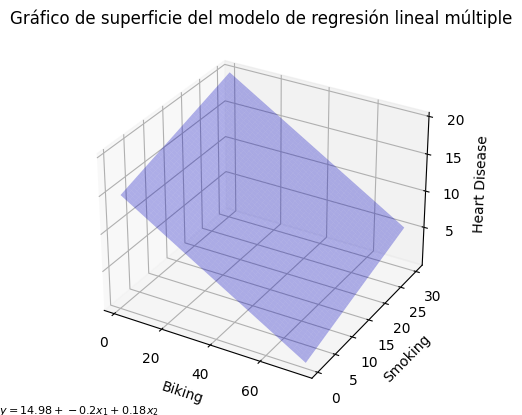

In [ ]:
import numpy as np # Libreria necesaria

fig = plt.figure() # Crear una figura
ax = fig.add_subplot(111, projection='3d') # Añade un subplot 3D

# Obtener los valores de las variables independientes y dependiente
x1 = df['biking'].values
x2 = df['smoking'].values
y = df['heart.disease'].values

# Crear una malla de coordenadas para el gráfico
x1_mesh, x2_mesh = np.meshgrid(np.linspace(x1.min(), x1.max(), 100), np.linspace(x2.min(), x2.max(), 100))

# Calcular los valores de la variable dependiente para la malla
y_mesh = modelo.params[0] + modelo.params[1] * x1_mesh + modelo.params[2] * x2_mesh

# Crear un gráfico de superficie con los valores de la malla
ax.plot_surface(x1_mesh, x2_mesh, y_mesh, color='blue', alpha=0.3)

# Añadir un título y las etiquetas de los ejes
ax.set_title("Gráfico de superficie del modelo de regresión lineal múltiple")
ax.set_xlabel("Biking")
ax.set_ylabel("Smoking")
ax.set_zlabel("Heart Disease")

# Añade la ecuacion del modelo al gráfico
ax.text(50, 10, 5, f"$y = {round(modelo.params[0], 2)} + {round(modelo.params[1], 2)}x_1 + {round(modelo.params[2], 2)}x_2$", size=8, color='black', zorder=10, horizontalalignment='center',transform=ax.transAxes)

# Mostrar el gráfico
plt.show()

# Supuestos del modelo de regresion lineal<a name="id3"></a>

**1. Linealidad del modelo**

Text(0.5, 1.0, 'Ajustados vrs Observados')

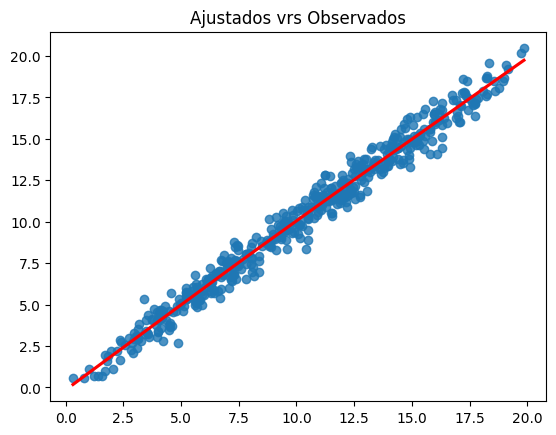

In [ ]:
fitted = modelo.predict() # Predice los valores ajustados del modelo

import seaborn as sns # Importa seaborn

# Crea un gráfico con los valores ajustados y observados
sns.regplot(x=fitted, y=y, lowess= True, line_kws={'color':'red'})

plt.title('Ajustados vrs Observados') # Titulo del grafico

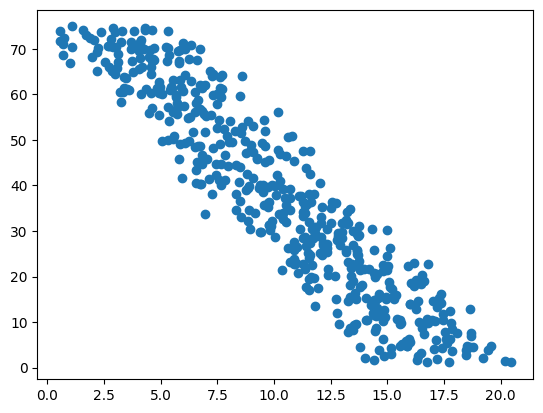

In [ ]:
plt.scatter(df["heart.disease"], df["biking"]) # Crea gráfico de dispersión
plt.show() # Muestra el gráfico

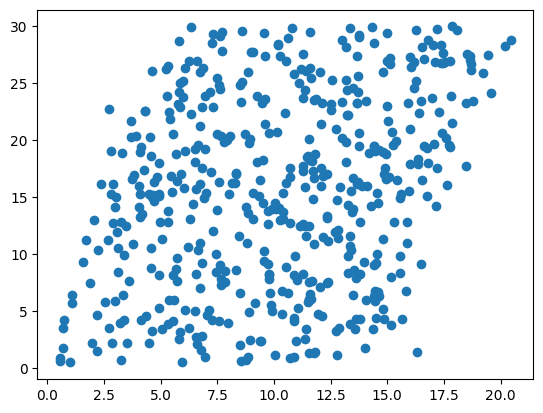

In [ ]:
plt.scatter(df["heart.disease"], df["smoking"]) # Crea gráfico de dispersión
plt.show() # Muestra el gráfico

**2. Normalidad de los residuos**

In [ ]:
residuos = modelo.resid # Obtener los residuos del modelo
residuos.mean() # media de los residuos es cercana a cero

# cuidado con el sobre ajuste

1.875518928025405e-14

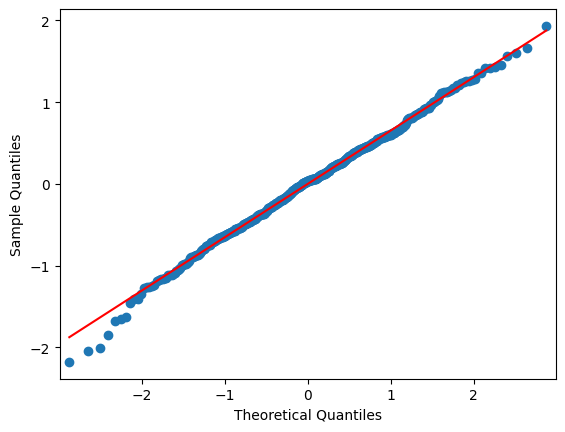

In [ ]:
# Crea un gráfico Q-Q de los residuos
fig = sm.qqplot(residuos, line="s")
plt.show() # Muestra el gráfico

In [ ]:
from scipy import stats # Libreria necesaria

# Shapiro-Wilk
# La hipotesis nula h0 es que los residuos son normales

# Realizar la prueba de Shapiro-Wilk a los residuos
stats.shapiro(residuos)

ShapiroResult(statistic=0.9969959259033203, pvalue=0.49340012669563293)

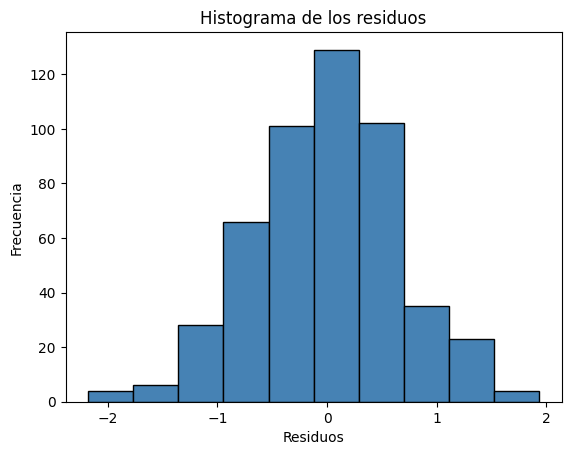

In [ ]:
# Crear un histograma de los residuos
plt.hist(residuos, color='steelblue', edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de los residuos')
plt.show()

La prueba de Shapiro-Wilk es una prueba estadística que se utiliza para comprobar si una muestra sigue una distribución normal. En este caso, la prueba de Shapiro-Wilk se aplicó a los residuos del modelo de regresión lineal múltiple. Los residuos son la diferencia entre los valores observados y los valores ajustados de la variable dependiente. El resultado de la prueba indica que el valor p es mayor que el nivel de significancia de 0.05, lo que significa que no podemos rechazar la hipótesis nula. Esto implica que no hay evidencia suficiente para afirmar que los residuos no siguen una distribución normal. Por lo tanto, se cumple el supuesto de normalidad de los residuos.

**3. Multicolinealidad**

Matriz de correlaciones para estudiar la multicolinealidad en el modelo de regresión lineal

In [ ]:
# Calcula la correlación entre las columnas del DataFrame y redondea a 4 decimales
round(df.corr(),4)

,biking,smoking,heart.disease
biking,1.0000,0.0151,-0.9355
smoking,0.0151,1.0000,0.3091
heart.disease,-0.9355,0.3091,1.0000


Para estudiar la multicolinealidad se usara el estadistico VIF el cual debe ser menor a 10 para descartar multicolinealidad

In [ ]:
# Importar el módulo necesario
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Calcular el VIF de la variable biking
vif_biking = vif(X, 1) # El índice 1 corresponde a la variable biking
print('VIF de biking:', vif_biking)

VIF de biking: 1.0002291565828216


In [ ]:
# Importar el módulo necesario
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Calcular el VIF de la variable smoking
vif_smoking = vif(X, 2) # El índice 2 corresponde a la variable smoking
print('VIF de smoking:', vif_smoking)

VIF de smoking: 1.0002291565828212


El estadístico VIF (factor de inflación de la varianza) es una medida que se utiliza para detectar la multicolinealidad en un modelo de regresión lineal múltiple. En este caso, el VIF se calculó para las variables biking y smoking. Estos valores de VIF son muy cercanos a 1, lo que significa que no hay multicolinealidad entre las variables independientes. Esto implica que las variables biking y smoking no están altamente correlacionadas entre sí y que se puede confiar en los coeficientes estimados y las pruebas de hipótesis del modelo.

**4. Homocedasticida: Igualdad de la varianza**

Text(0.5, 1.0, 'Valores Ajustados vrs Residuos')

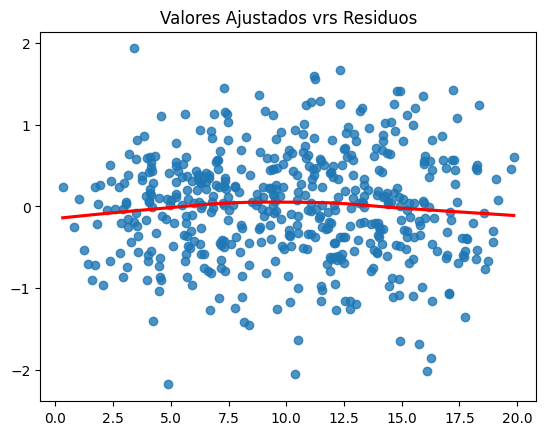

In [ ]:
# Creamos un gráfico con los valores ajustados y los residuos
sns.regplot(x=fitted, y=residuos, lowess = True, line_kws={'color':'red'})

plt.title('Valores Ajustados vrs Residuos') # Título del gráfico

Text(0.5, 1.0, 'Valores Ajustados vrs Residuos Estandarizados')

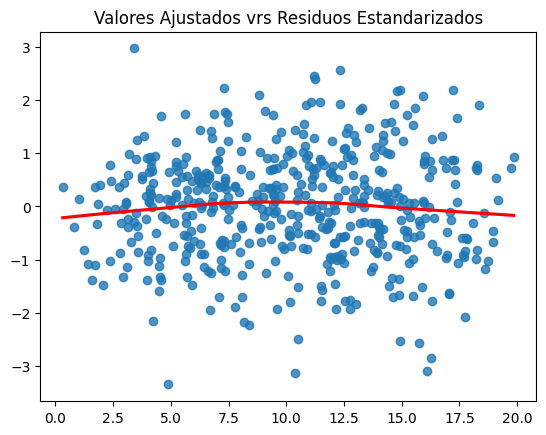

In [ ]:
# Se obtienen los residuos estandarizados del modelo
residuos_estand = modelo.get_influence().resid_studentized_internal

# Creamos un gráfico con los valores ajustados y los residuos estandarizados
sns.regplot(x=fitted, y=residuos_estand, lowess = True, line_kws={'color':'red'})

plt.title('Valores Ajustados vrs Residuos Estandarizados') # Título del gráfico

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan # Modulo necesario

# Prueba de Breusch-Pagan a los residuos
# La hipotesis nula h0 = varianza constante es decir homocedasticida

bp_test = het_breuschpagan(residuos,modelo.model.exog)

print(bp_test)

print('Breusch-Pagan: Valor p =', bp_test[1])

(5.777529105292421, 0.05564491652758449, 2.9050653680249265, 0.055679217630254886)
Breusch-Pagan: Valor p = 0.05564491652758449


La prueba Breusch-Pagan es una prueba estadística que se utiliza para comprobar si hay heterocedasticidad en un modelo de regresión lineal.

La hipótesis nula de la prueba es que hay homocedasticidad, es decir, que los residuos tienen una varianza constante.

En este caso, la prueba Breusch-Pagan se aplicó a los residuos del modelo de regresión lineal, donde el valor p es mayor que el nivel de significancia de 0.05, lo que significa que no podemos rechazar la hipótesis nula. Esto implica que no hay evidencia suficiente para afirmar que los residuos tienen una varianza no constante.

**5. Independencia de los residuos: No autocorrelacion**

In [ ]:
from statsmodels.stats.stattools import durbin_watson # Modulo necesario

# Realizar la prueba de Durbin-Watson a los residuos
# Durbin-Watson debe estar entre 2 y 3

d = durbin_watson(residuos)
print('Estadístico Durbin Watson:', d)

Estadístico Durbin Watson: 1.9173871065767456


El estadístico Durbin Watson es una medida que se utiliza para detectar la autocorrelación en los residuos de un modelo de regresión lineal. Se aplico el estadístico Durbin Watson a los residuos del modelo de regresión lineal múltiple. El resultado es un  valor que está cerca de 2, lo que significa que no hay evidencia de autocorrelación en los residuos. Esto implica que los residuos son independientes entre sí y que no hay correlación serial.

**6. Supuesto de exogeneida y endogeneida**

No se estudiara en este documento